# Optimizers Exercise

In this exercise, we will implement gradient descent - plain, and with momentum - and use it to find local minima of a nonconvex test function.

## Part 1: Defining the objective function

**Questions:**
1. Define a function `objective(x, y)` that implements [Himmelblau's test function](https://en.wikipedia.org/wiki/Himmelblau%27s_function) defined by $f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$. Make sure that the tests for this function given below pass.
2. Define a function `objective_(x, y)` that implements the gradient $\nabla f(x, y) = (\frac{\partial f}{\partial x}(x, y), \frac{\partial f}{\partial y}(x, y))$ of the above function. It should return a tuple containing two numbers. Again, make sure that the tests for this function given below pass. Hint: You might find [Wolfram Alpha](https://www.wolframalpha.com/) useful for calculating partial derivatives. Examples: [(1)](https://www.wolframalpha.com/input/?i=d%2Fdx+%28x%5E2+%2B+2y%29) [(2)](https://www.wolframalpha.com/input/?i=d%2Fdy+%28x%5E2+%2B+2y%29)
3. Use the code given below to create surface and contour plots of the test function. Explain briefly what you see – in particular, the number and approximate locations of local minima.

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def objective(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def objective_(x, y):
    df_dx = 4*x*(x**2 + y - 11) + 2*(x + y**2 - 7)
    df_dy = 2*(x**2 + y - 11) + 4*y*(x + y**2 - 7)
    return df_dx, df_dy


In [46]:
### TESTS FOR QUESTION 1 ###
assert objective(0, 0) == 170
assert objective(1, 1) == 106
assert objective(-5, 0) == 340

In [47]:
### TESTS FOR QUESTION 2 ###
assert type(objective_(0, 0)) is tuple
assert len(objective_(0, 0)) == 2
assert objective_(0, 0) == (-14, -22)
assert objective_(1, 1) == (-46, -38)
assert objective_(-5, 0) == (-304, 28)

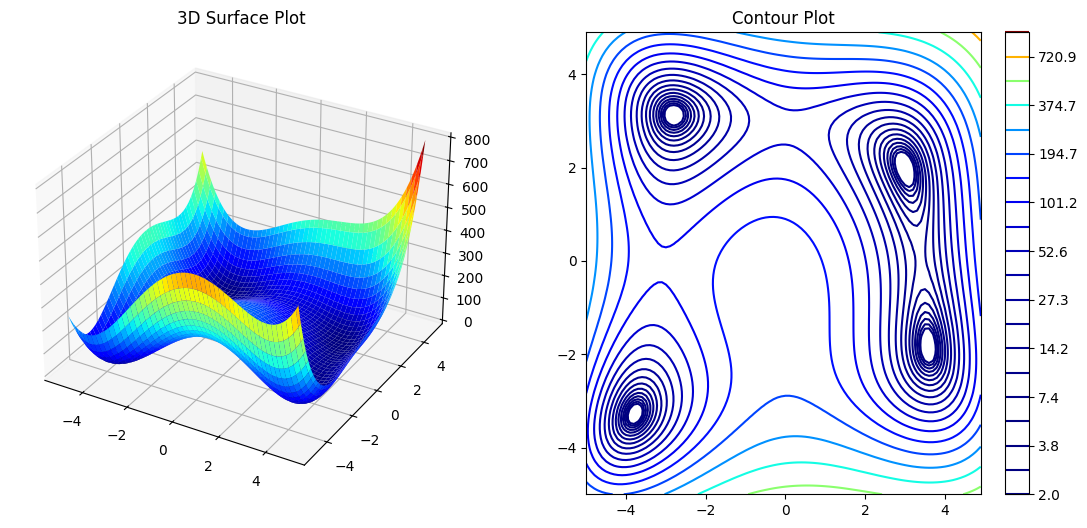

In [50]:
### CODE FOR QUESTION 3 ###
def plot_test_function(function, min_lim=-5, max_lim=5, step=0.1):
  xaxis = np.arange(min_lim, max_lim, step)
  yaxis = np.arange(min_lim, max_lim, step)
  x_vals, y_vals = np.meshgrid(xaxis, yaxis)
  z_vals = function(x_vals, y_vals)
  
  fig = plt.figure(figsize=(14, 6))

  ax1 = fig.add_subplot(1, 2, 1, projection='3d')
  ax1.plot_surface(x_vals, y_vals, z_vals, cmap='jet')
  ax1.title.set_text('3D Surface Plot')

  ax2 = fig.add_subplot(1, 2, 2)
  levels = np.logspace(0.3, 3, 20)
  cont = ax2.contour(x_vals, y_vals, z_vals, levels, cmap='jet')
  fig.colorbar(cont, ax=ax2)
  ax2.title.set_text('Contour Plot')

  plt.show()

plot_test_function(objective)

### We can see on the contour plot that there are 4 minima at points :  (-3.7, -3) , (3.5, -1.5) , (3, 2) , (-2.7, 3)

## Part 2: Gradient Descent

We will now implement the **gradient descent (GD)** algorithm to find local minima of our test function.

Recall that for a function $f \colon \mathbb{R}^2 \to \mathbb{R}$, GD begins with initial values $(x, y) = (x_0, y_0)$ and then repeatedly updates them by:

$$x := x - \epsilon \cdot \frac{\partial f}{\partial x}(x, y)$$
$$y := y - \epsilon \cdot \frac{\partial f}{\partial y}(x, y)$$

where $\epsilon$ is the learning rate hyperparameter.

**Questions:**

4. Implement the function `gradient_descent(...)` using the code below, using the information in the docstring. Make sure that all the tests pass.


5. Use the code below to plot different trajectories of your gradient descent implementation. When calling the function, for the `initializations` parameter pass a list of `(x, y)` pairs (e.g. `[(0, 0), (1, 1), ...]`. Find different initial values of `(x, y)` that make gradient descent find each of the local minima of the objective function.
6. Try running gradient descent twice, once with learning rate `1e-3 (0.001)` and once with learning rate `1e-4 (0.0001)`. Use 200 iterations and initialization `(x, y) = (-1, -1)` both times. Plot iteration vs. objective function value for both trajectories, and include the learning rate and the final objective value in the title of each plot.
7. How many iterations did it take for each trajectory in the last question to achieve objective function value of less than `0.01`? (If at all)
8. Briefly explain your results from the previous two questions. Which learning rate performed better? Why? What if the number of iterations was adjusted?

In [52]:
### CODE FOR QUESTION 4 ###
def gradient_descent(x_init=0, y_init=0, lr=1e-3, iterations=200):
    xs = np.zeros(iterations + 1)
    ys = np.zeros(iterations + 1)
    zs = np.zeros(iterations + 1)

    x = x_init
    y = y_init
    xs[0] = x
    ys[0] = y
    zs[0] = objective(x_init, y_init)

    for i in range(iterations):
        df_dx, df_dy = objective_(x, y)
        x -= lr * df_dx
        y -= lr * df_dy
        xs[i + 1] = x
        ys[i + 1] = y
        zs[i + 1] = objective(x, y)

    return xs, ys, zs

In [54]:
### TESTS FOR QUESTION 4 ###
assert type(gradient_descent(iterations=1)) is tuple
assert len(gradient_descent(iterations=1)) == 3
assert gradient_descent(iterations=1)[0][0] == 0
assert gradient_descent(iterations=1)[0][0] == 0
assert gradient_descent(iterations=1)[1][0] == 0
ten_iters = gradient_descent(iterations=10)
assert len(ten_iters) == 3
assert len(ten_iters[0]) == len(ten_iters[1]) == len(ten_iters[2]) == 11
assert np.isclose(ten_iters[0],
           [0., 0.014, 0.02858579, 0.04377723, 0.05959451,
            0.07605809, 0.09318871, 0.1110073 , 0.12953493,
            0.14879277, 0.16880203]).all()
assert np.isclose(ten_iters[1],
            [0., 0.022, 0.04457033, 0.06772208, 0.09146592,
            0.11581206, 0.14077016, 0.16634919, 0.19255734,
            0.21940194, 0.24688929]).all()
assert np.isclose(ten_iters[2],
            [170., 169.30961445, 168.57645786, 167.79805192,
            166.97181637, 166.09507165, 165.16504283, 164.17886494,
            163.13359016, 162.0261967, 160.8535999 ]).all()

In [56]:
### CODE FOR QUESTION 5 ###
def plot_trajectories(initializations, min_lim=-5, max_lim=5, step=0.1):
  xaxis = np.arange(min_lim, max_lim, step)
  yaxis = np.arange(min_lim, max_lim, step)
  x_vals, y_vals = np.meshgrid(xaxis, yaxis)
  z_vals = objective(x_vals, y_vals)
  
  levels = np.logspace(0.3, 3, 20)
  plt.contour(x_vals, y_vals, z_vals, levels, cmap='jet', alpha=0.5)
  plt.colorbar()
  plt.title(f'GD Trajectories')

  for x_init, y_init in initializations:
    xs, ys, zs = gradient_descent(x_init=x_init, y_init=y_init)
    plt.plot(xs, ys, color='black')
    plt.scatter(xs[-1], ys[-1], marker='x', color='black', s=100)

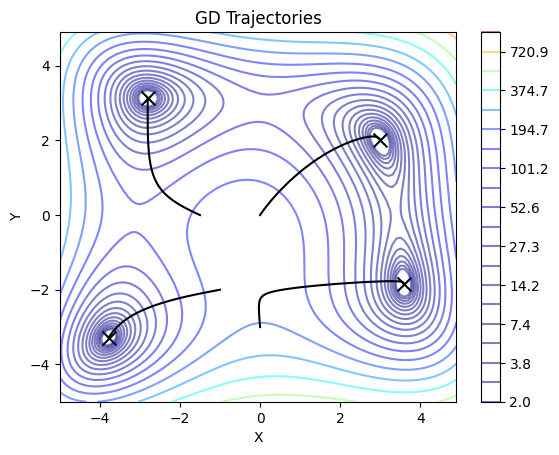

In [73]:
# Define initializations close to each of the minima
initializations = [(0, 0),(-1.5, 0), (0,-3) ,(-1, -2)]

# Plot trajectories
plot_trajectories(initializations)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


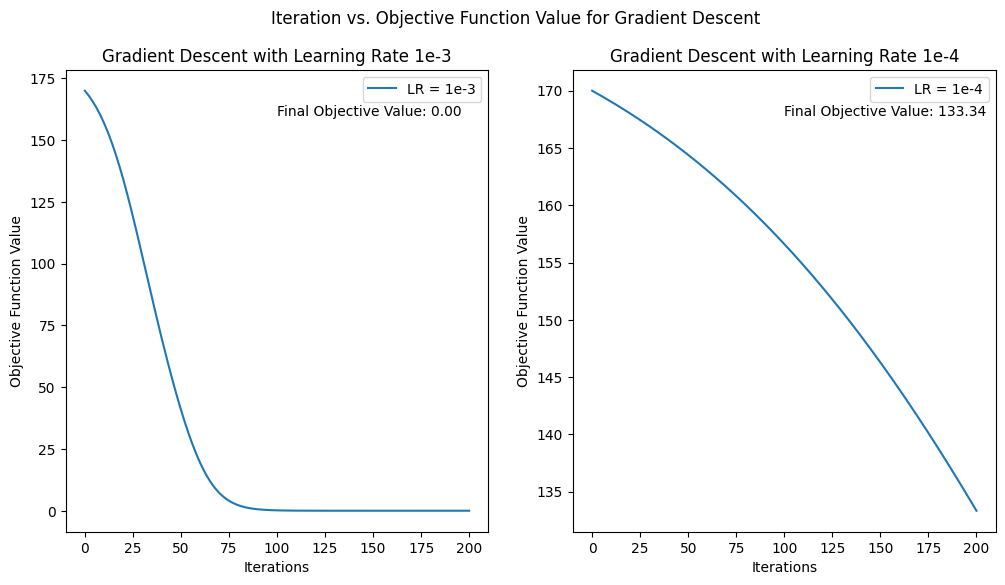

In [75]:
# 6 
# Run gradient descent with learning rate 1e-3
xs_1, ys_1, zs_1 = gradient_descent(x_init=-1, y_init=-1, lr=1e-3, iterations=200)

# Run gradient descent with learning rate 1e-4
xs_2, ys_2, zs_2 = gradient_descent(x_init=-1, y_init=-1, lr=1e-4, iterations=200)

# Plot iteration vs. objective function value for both trajectories
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(201), zs_1, label='LR = 1e-3')
plt.title('Gradient Descent with Learning Rate 1e-3')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.text(0.5, 0.9, f'Final Objective Value: {zs_1[-1]:.2f}', transform=plt.gca().transAxes)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(201), zs_2, label='LR = 1e-4')
plt.title('Gradient Descent with Learning Rate 1e-4')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.text(0.5, 0.9, f'Final Objective Value: {zs_2[-1]:.2f}', transform=plt.gca().transAxes)
plt.legend()

plt.suptitle('Iteration vs. Objective Function Value for Gradient Descent')
plt.show()


7. We can see that the first learning rate was way more efficient, after around 80 iterations, the value was already 0 but for the second learning rate we can see that even after the 200th iterations, the value was at 135
8. The first learning rate (1e-3) performed better as it achieved a significantly lower objective function value in fewer iterations compared to the second learning rate (1e-4). This is because the larger learning rate allowed for larger updates to the parameters at each iteration, leading to faster convergence towards the minima. If the number of iterations was adjusted, the performance of the learning rates may vary, but generally, a larger learning rate would still tend to converge faster

## Part 3: Momentum

We will now implement **gradient descent with momentum**. Recall that GD with momentum uses the following hyperparameters:

* $\epsilon$ (learning rate)
* $\alpha \in [0, 1)$

For a function $f \colon \mathbb{R}^2 \to \mathbb{R}$, GD with momentum keeps track of values $(v_x, v_y)$; you may assume that these are initialized to zero.

At each iteration, the following updates are performed:

\begin{align*}
v_x &:= \alpha \cdot v_x - \epsilon \cdot \frac{\partial f}{\partial x}(x, y) \\
v_y &:= \alpha \cdot v_y - \epsilon \cdot \frac{\partial f}{\partial y}(x, y) \\
x &:= x + v_x \\
y &:= y + v_y
\end{align*}

Notice that when $\alpha = 0$ this is equivalent to plain GD.

(For the bonus question) Also recall that **Nesterov momentum** modifies the above by using partial derivatives $\frac{\partial f}{\partial x}(x', y')$ and $\frac{\partial f}{\partial y}(x', y')$, where $x' = x + \alpha \cdot v_x$ and $y' = y + \alpha \cdot v_y$.

**Questions:**

9. Implement the function `momentum(...)` using the code below, using the information in the docstring. Make sure that all the tests pass.
10. Repeat question 5 but using gradient descent with momentum (replace `gradient_descent(...)` with `momentum(...)` in the code). Explain briefly what you see.
11. Repeat questions 6-7 using gradient descent with momentum. Explain briefly how the results change using momentum.
12. (BONUS) Add a boolean parameter `nesterov=...` to your function `momentum(...)`. When it equals `True`, updates should be made using Nesterov momentum. Repeat questions 10-11 using Nesterov momentum and briefly explain the results.

In [78]:
# 9 
def momentum(x_init=0, y_init=0, lr=1e-3, momentum=0.9, iterations=200):
    """
    Performs gradient descent with momentum to find the minimum of the objective function.
    Starts with initial values v = (vx, vy) both set to zero.
    For each iteration, updates v using the gradient G of the objective
    using momentum*v - lr*G.
    Finally updates x and y values using the new v values.
    
    Parameters:
    * x_init, y_init: Starting (x, y) values
    * lr: Learning rate (epsilon)
    * momentum: Momentum parameter (alpha)
    * iterations: Number of steps of GD to perform.

    Returns a tuple (xs, ys, zs) - same as for gradient_descent()
    """
    xs = np.zeros(iterations + 1)
    ys = np.zeros(iterations + 1)
    zs = np.zeros(iterations + 1)

    x = x_init
    y = y_init
    xs[0] = x
    ys[0] = y
    zs[0] = objective(x_init, y_init)

    vx = 0
    vy = 0

    for i in range(iterations):
        df_dx, df_dy = objective_(x, y)
        vx = momentum * vx - lr * df_dx
        vy = momentum * vy - lr * df_dy
        x += vx
        y += vy
        xs[i + 1] = x
        ys[i + 1] = y
        zs[i + 1] = objective(x, y)

    return xs, ys, zs


In [79]:
### TESTS FOR QUESTION 9 ###
assert type(momentum(iterations=1)) is tuple
assert len(momentum(iterations=1)) == 3
assert momentum(iterations=1)[0][0] == 0
assert momentum(iterations=1)[0][0] == 0
assert momentum(iterations=1)[1][0] == 0
ten_iters_m = momentum(iterations=10)
assert len(ten_iters_m) == 3
assert len(ten_iters_m[0]) == len(ten_iters_m[1]) == len(ten_iters_m[2]) == 11
assert np.isclose(ten_iters_m[0],
            [0., 0.014, 0.04118579, 0.08136363, 0.13486591,
            0.20247517, 0.28535724, 0.38499275, 0.50309348, 0.6414866,
            0.80194522]).all()
assert np.isclose(ten_iters_m[1],
            [0., 0.022, 0.06437033, 0.1261622, 0.20699276,
            0.30693856, 0.42642393, 0.56608804, 0.72661021, 0.90846911,
            1.11160913]).all()
assert np.isclose(ten_iters_m[2],
            [170., 169.30961445, 167.91834368, 165.74395793,
            162.64032678, 158.40090659, 152.76270156, 145.41685062,
            136.03444033, 124.31917235, 110.10031941]).all()

In [80]:
# 10 

In [82]:
def plot_trajectories(initializations, min_lim=-5, max_lim=5, step=0.1):
  xaxis = np.arange(min_lim, max_lim, step)
  yaxis = np.arange(min_lim, max_lim, step)
  x_vals, y_vals = np.meshgrid(xaxis, yaxis)
  z_vals = objective(x_vals, y_vals)
  
  levels = np.logspace(0.3, 3, 20)
  plt.contour(x_vals, y_vals, z_vals, levels, cmap='jet', alpha=0.5)
  plt.colorbar()
  plt.title(f'GD Trajectories')

  for x_init, y_init in initializations:
    xs, ys, zs = momentum(x_init=x_init, y_init=y_init)
    plt.plot(xs, ys, color='black')
    plt.scatter(xs[-1], ys[-1], marker='x', color='black', s=100)

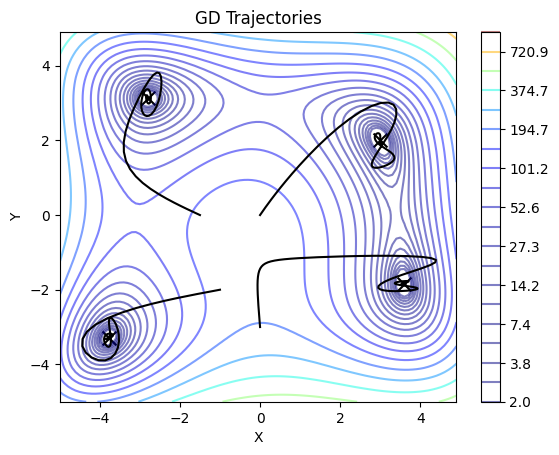

In [83]:
# Define initializations close to each of the minima
initializations = [(0, 0),(-1.5, 0), (0,-3) ,(-1, -2)]

# Plot trajectories
plot_trajectories(initializations)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In plain gradient descent, updates are solely based on the current gradient, while in gradient descent with momentum, the updates are influenced by the momentum term, which smooths out the updates based on the history of previous gradients. This smoothing effect helps gradient descent with momentum to navigate through regions with high curvature or noisy gradients more efficiently, leading to smoother trajectories and potentially faster convergence towards the minima. We obtained different trajectories than the first graph. 

In [84]:
# 11

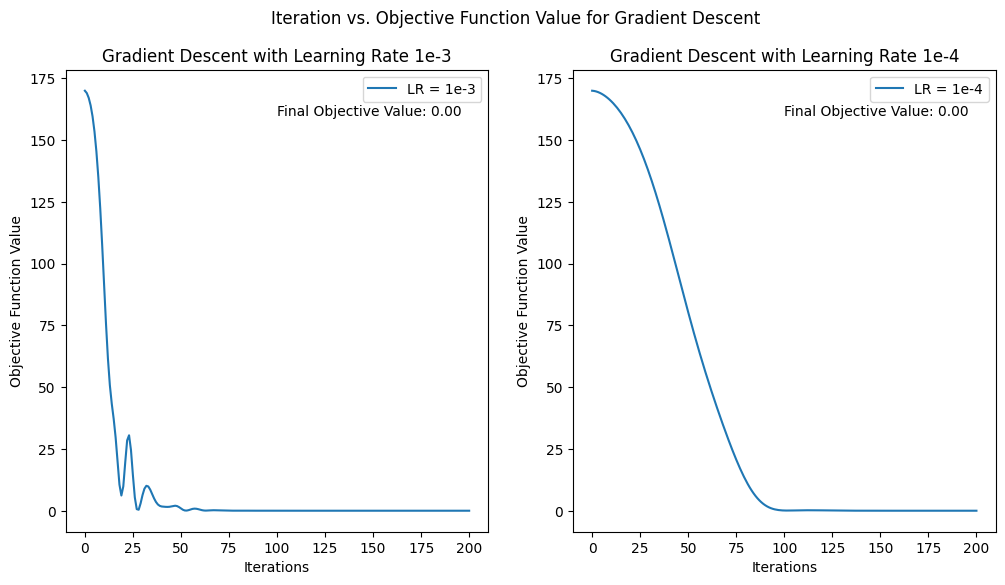

In [86]:
# 6 
# Run gradient descent with learning rate 1e-3
xs_1, ys_1, zs_1 = momentum(x_init=-1, y_init=-1, lr=1e-3, iterations=200)

# Run gradient descent with learning rate 1e-4
xs_2, ys_2, zs_2 = momentum(x_init=-1, y_init=-1, lr=1e-4, iterations=200)

# Plot iteration vs. objective function value for both trajectories
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(201), zs_1, label='LR = 1e-3')
plt.title('Gradient Descent with Learning Rate 1e-3')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.text(0.5, 0.9, f'Final Objective Value: {zs_1[-1]:.2f}', transform=plt.gca().transAxes)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(201), zs_2, label='LR = 1e-4')
plt.title('Gradient Descent with Learning Rate 1e-4')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.text(0.5, 0.9, f'Final Objective Value: {zs_2[-1]:.2f}', transform=plt.gca().transAxes)
plt.legend()

plt.suptitle('Iteration vs. Objective Function Value for Gradient Descent')
plt.show()


In [ ]:
We can see that both perform better and that the slower learning with momentum has a similar curve as the faster rate without momentum, the first rate converges to zero in around 50 iterations while the second rate takes a 